# **Final Project Submission**

Name: Austin Murunga

## **Business Problem**
### **Crop Yield Production in India**

In a country where agriculture plays a key role in the economy, yield of crops practices tremendous variability as many factors like climate changes soil quality and availability of resources. This will be a model in machine learning to predict the production of crops across various states and districts within India using features like state, district, crop type for this edition. Will keep on updating based data availability.

### **Objectives**

**Crop Selection Optimization:** Yield prediction to suggest based on the predicted yield of maximum Output gives farmers a clue about growing best crop in their region & season.

**Resource Distribution:** Advise policy makers on the best way of allocating resources, e. g water and fertilisers

**Risk Management:** Be proactive by forecasting likely yield deficits.

**Impact:** Reliable predictions will help farmers and officials take educated decisions which in turn can enhance productivity, economical utilization of resources and farmer sustainability India.

### Key features

1.State: The state in India where the crop is cultivated.

2.District: The district within the state where the crop is cultivated.

3.Crop: The type of crop being cultivated (e.g., rice, wheat, maize).

4.Season: The season during which the crop is cultivated (e.g., Kharif, Rabi).

5.Crop Year: The year in which the crop was cultivated

6.Area: The area of land (in hectares) used for cultivating the crop.

7.Production: The total production of the crop (in tonnes), which is the target variable for prediction

### Import Libraries

In [143]:
#basic libaries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#algorithm used to build Machine Learning model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler


### Load the Data

Import the data stored in ***crop_production.csv***

In [144]:
data = pd.read_csv('crop_production.csv')
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [145]:
# basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [146]:
#first 5 rows of every column
print(data.head())

                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  


In [147]:
data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


### Missing Values

In [148]:
#checking missing values 
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

Will fill Production with median to avoid outliers

In [149]:
#fill issing values in the production column with median 
data['Production'].fillna(data['Production'].median(), inplace=True)

#inspect
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

Looks good!

### Split the data into Train and Test


I will create another column called 'Yield_Production' based on the 'Production' column where 45% of 'Production' returns 'High' to the 'Yield_Production' column and the 'Low' to the vice

In [150]:
# calculate the 80% pecent threshold of the production column
threshold = data['Production'].quantile(0.45)

#create the Yield_Production column
data['Yield_Production'] = data['Production'].apply(lambda x: 'HIGH' if x > threshold else 'LOW')

#inspect
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield_Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,HIGH
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,LOW
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,LOW
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,HIGH
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,LOW


In [151]:
#checking the distribution of Yield_Production
data['Yield_Production'].value_counts()

Yield_Production
HIGH    135350
LOW     110741
Name: count, dtype: int64

In [152]:
#features of the data
y= data['Yield_Production']
X = data.drop(columns=['Yield_Production', 'Production'], axis= 1)

#split the data into training and testing sets (80% train and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 

#stratify=y ensures that the class distribution (High/Low) is maintained in both the training and testing sets.

#inspect the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (196872, 6)
X_test shape: (49219, 6)
y_train shape: (196872,)
y_test shape: (49219,)


In [153]:
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield_Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,HIGH
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,LOW
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,LOW
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,HIGH
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,LOW
...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0,HIGH
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0,LOW
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,HIGH
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0,HIGH


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State_Name        246091 non-null  object 
 1   District_Name     246091 non-null  object 
 2   Crop_Year         246091 non-null  int64  
 3   Season            246091 non-null  object 
 4   Crop              246091 non-null  object 
 5   Area              246091 non-null  float64
 6   Production        246091 non-null  float64
 7   Yield_Production  246091 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 15.0+ MB


In [155]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'Yield_Production'],
      dtype='object')

### Pre-Processing of the Data

In [156]:
#categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.to_list()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.to_list()

print(f'Numerical Columns:', numerical_cols) 
print(f'Categorical columns:', categorical_cols)

Numerical Columns: ['Crop_Year', 'Area']
Categorical columns: ['State_Name', 'District_Name', 'Season', 'Crop']


In [157]:
#PreProcess Numerical Data
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numerical_cols])
X_test_num = scaler.transform(X_test[numerical_cols])

print(X_train_num)
print('_______________________________')
print(X_test_num)

[[-0.12842799  1.4261075 ]
 [ 0.88133562 -0.21614314]
 [-1.54209705 -0.21066807]
 ...
 [ 1.08328835  0.24875572]
 [ 0.07352473 -0.23129597]
 [ 1.08328835 -0.18647367]]
_______________________________
[[-1.1381916  -0.20137588]
 [-0.73428616 -0.23175865]
 [ 0.88133562 -0.15942606]
 ...
 [-0.73428616 -0.22701617]
 [ 0.47743018 -0.19428142]
 [-1.34014432 -0.10490672]]


In [158]:
#Preprocess Categorical data
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat = encoder.fit_transform(X_train[categorical_cols])
X_test_cat = encoder.transform(X_test[categorical_cols])

print(X_train_cat)
print('_______________________________')
print(X_test_cat)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
_______________________________
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [159]:
#Preprocessed data
X_train_processed = np.hstack((X_train_num, X_train_cat))
X_test_processed = np.hstack((X_test_num, X_test_cat))

#quick
print(X_train_processed)
print('_______________________________________________________________')
print(X_test_processed)

[[-0.12842799  1.4261075   0.         ...  0.          0.
   0.        ]
 [ 0.88133562 -0.21614314  0.         ...  0.          0.
   0.        ]
 [-1.54209705 -0.21066807  0.         ...  0.          0.
   0.        ]
 ...
 [ 1.08328835  0.24875572  0.         ...  0.          0.
   0.        ]
 [ 0.07352473 -0.23129597  0.         ...  0.          0.
   0.        ]
 [ 1.08328835 -0.18647367  0.         ...  0.          0.
   0.        ]]
_______________________________________________________________
[[-1.1381916  -0.20137588  0.         ...  0.          0.
   0.        ]
 [-0.73428616 -0.23175865  0.         ...  0.          0.
   0.        ]
 [ 0.88133562 -0.15942606  0.         ...  0.          0.
   0.        ]
 ...
 [-0.73428616 -0.22701617  0.         ...  0.          0.
   0.        ]
 [ 0.47743018 -0.19428142  0.         ...  0.          0.
   0.        ]
 [-1.34014432 -0.10490672  0.         ...  0.          0.
   0.        ]]


### Train the Model 

In [160]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_processed, y_train)

LogisticRegression(max_iter=1000)

### Model Evaluation 

In [161]:
y_pred = model.predict(X_test_processed)
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

        HIGH       0.93      0.87      0.90     27070
         LOW       0.85      0.93      0.89     22149

    accuracy                           0.89     49219
   macro avg       0.89      0.90      0.89     49219
weighted avg       0.90      0.89      0.89     49219



#### Confusion Matrix

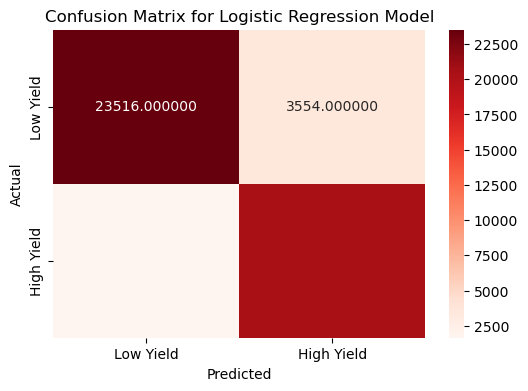

In [162]:
confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix, annot=True, fmt='2f', cmap='Reds', xticklabels=['Low Yield', 'High Yield'], 
            yticklabels=['Low Yield', 'High Yield'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()